# Homework-13

1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need

In [123]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator


low_memory=False
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import linear_model as lm

In [124]:
bottle_df = pd.read_csv("bottle.csv", index_col=False, dtype='unicode')
cast_df = pd.read_csv('cast.csv', dtype='unicode')

In [125]:
bottle_df = pd.read_csv("bottle.csv", index_col=False, dtype='unicode')
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50000,33.44000,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46000,33.44000,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46000,33.43700,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45000,33.42000,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45000,33.42100,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
bottle_df = pd.read_csv("bottle.csv", index_col=False)

# Below two columns are of mixed type:
# 47: IncTim
# 73: DIC Quality Comment

C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [598]:
bottle_df = pd.read_csv("bottle.csv", index_col=False, low_memory=False )

In [599]:
bottle_df.shape

(864863, 74)

In [600]:
print(bottle_df.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [601]:
print(bottle_df.dtypes)

Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   int64
                        ...   
TA1                    float64
TA2                    float64
pH2                    float64
pH1                    float64
DIC Quality Comment     object
Length: 74, dtype: object


In [602]:
bottle_df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [520]:
#Removing missing data
bottle_df.dropna()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment


In [603]:
categorical_data = bottle_df.select_dtypes("object")
numerical_data = bottle_df.select_dtypes("number")

In [604]:
categorical_data.describe(include=['O'])   #  CATEGORICAL DATA

,Sta_ID,Depth_ID,IncTim,DIC Quality Comment
count,864863,864863,14437,55
unique,2634,864850,199,37
top,090.0 045.0,20-16045S-MX-110-2018-06330900-0010A-3,12/30/1899 05:45:00,CTD Bottle Misfire; DIC sample compromised. C...
freq,10043,2,325,9


In [597]:
numerical_data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [387]:
null_count=numerical_data.isnull().sum(axis=0)
x=null_count.reset_index()
x.head(50)
# To have more data for analyses purpose, i would drop all the columns where the sum of null values in a column is greater
# than 40,000

,index,0
0,Cst_Cnt,0
1,Btl_Cnt,0
2,Depthm,0
3,T_degC,10963
4,Salnty,47354
5,O2ml_L,168662
6,STheta,52689
7,O2Sat,203589
8,Oxy_µmol/Kg,203595
9,BtlNum,746196


In [605]:
numerical_data.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
Cst_Cnt,1.000000,0.999345,-0.162222,0.089329,-0.198024,0.156096,-0.089902,0.136510,0.147493,-0.026749,...,0.005807,-0.040576,-0.161961,-0.604945,-0.036155,-0.097938,-0.075060,-0.115212,-0.262587,0.020778
Btl_Cnt,0.999345,1.000000,-0.161617,0.090118,-0.195207,0.154219,-0.089521,0.134732,0.145498,-0.027514,...,0.009648,-0.035778,-0.161348,-0.595142,-0.035516,-0.097251,-0.074255,-0.114165,-0.259082,0.020315
Depthm,-0.162222,-0.161617,1.000000,-0.681201,0.572630,-0.592399,0.582710,-0.595547,-0.589175,-0.681935,...,-0.279636,-0.201450,0.999994,-0.018605,0.567855,0.572374,0.786873,0.866185,0.223304,-0.611798
T_degC,0.089329,0.090118,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.850596,0.795543,0.750413,...,0.108925,0.014987,-0.679852,0.006503,-0.936239,-0.949972,-0.742196,-0.889635,0.547436,0.743735
Salnty,-0.198024,-0.195207,0.572630,-0.505266,1.000000,-0.823870,0.603470,-0.790231,-0.824338,-0.693341,...,-0.029373,-0.003063,0.571405,-0.000758,0.938153,0.955942,0.895124,0.937147,0.583807,0.106417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DIC2,-0.097938,-0.097251,0.572374,-0.949972,0.955942,-0.941214,0.965546,-0.962977,-0.941528,-0.958549,...,0.024819,0.220101,0.570633,-0.026912,0.991091,1.000000,0.885735,0.888669,NaN,NaN
TA1,-0.075060,-0.074255,0.786873,-0.742196,0.895124,-0.802493,0.779899,-0.788291,-0.802435,-0.737828,...,0.006186,-0.010690,0.785334,0.025613,0.853682,0.885735,1.000000,0.994924,0.616844,0.260047
TA2,-0.115212,-0.114165,0.866185,-0.889635,0.937147,-0.726460,0.887778,-0.767766,-0.727023,-0.828905,...,0.265152,0.235116,0.865140,0.020177,0.883278,0.888669,0.994924,1.000000,0.578090,0.577613
pH2,-0.262587,-0.259082,0.223304,0.547436,0.583807,0.174204,-0.480397,0.732628,0.180058,-0.457365,...,0.047099,0.049127,0.223304,-0.457365,NaN,NaN,0.616844,0.578090,1.000000,0.995913


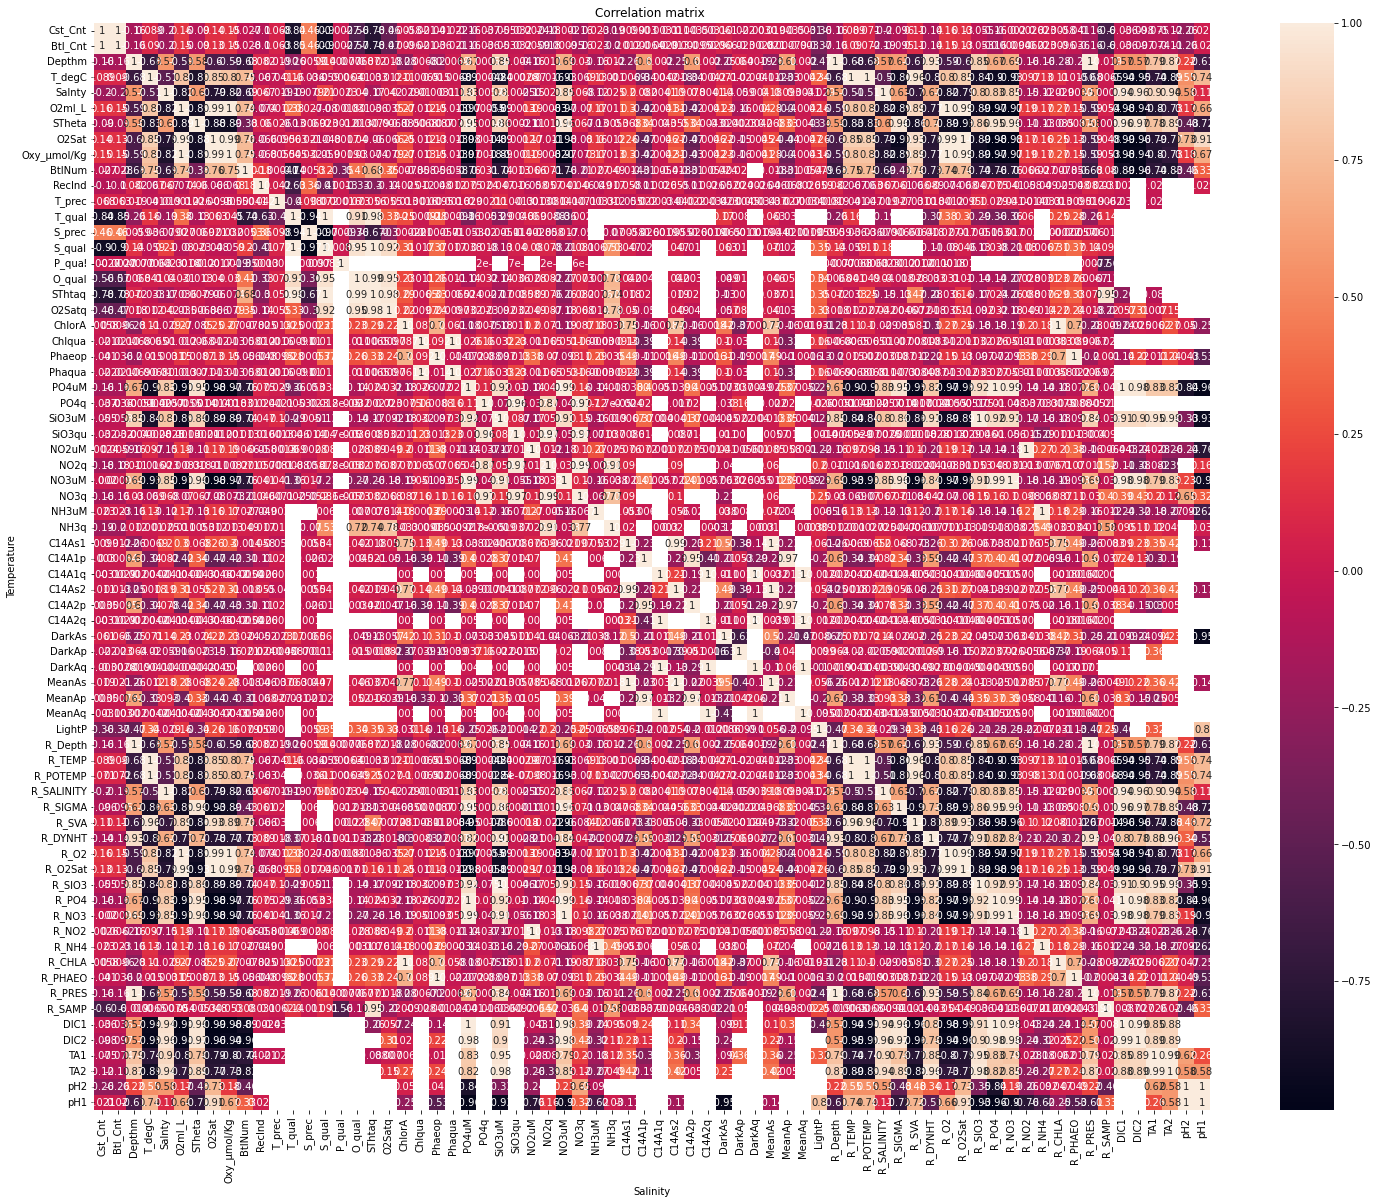

In [186]:
correlation_mat = numerical_data.corr()
fig_dims = (25, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(correlation_mat, annot = True, ax=ax)
plt.title("Correlation matrix ")
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

In [236]:
percent_missing = round(numerical_data.isna().sum() / numerical_data.shape[0] * 100, 2)
percent_missing.head()

Cst_Cnt    0.0
Btl_Cnt    0.0
Depthm     0.0
RecInd     0.0
R_Depth    0.0
dtype: float64

In [237]:
values = {"Total number of missing values": numerical_data.isna().sum(), "Percent of Missing Values": percent_missing}
values

{'Total number of missing values': Cst_Cnt    0
 Btl_Cnt    0
 Depthm     0
 RecInd     0
 R_Depth    0
 R_PRES     0
 dtype: int64,
 'Percent of Missing Values': Cst_Cnt    0.0
 Btl_Cnt    0.0
 Depthm     0.0
 RecInd     0.0
 R_Depth    0.0
 R_PRES     0.0
 dtype: float64}

In [242]:
# convert the dictionary to a dataframe
missing = pd.DataFrame(values)

In [243]:
columns_to_drop = missing[missing["Percent of Missing Values"] > .3].index
columns_to_drop

Index([], dtype='object')

In [606]:
# drop the columns
numerical_data.drop(columns_to_drop, axis=1, inplace=True)

C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Features Salinity and Temperature are chosen

X = np.array(df['Salinity']).reshape(-1, 1).astype(float)
y = np.array(df['Temperature']).reshape(-1, 1).astype(float)

In [608]:
# Extract 2 columns 'T_degC','Salnty' for better understanding 
df = bottle_df[['T_degC','Salnty']]
#Rename the columns
df.columns = ['Temperature', 'Salinity']

In [609]:
df = df[:5000]      # lets take limit for speed regression calculating
df.head()

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [610]:
df.isnull().values.any()

True

In [1]:
df = df.dropna()[:5000]

NameError: name 'df' is not defined

In [552]:
df.shape

(4833, 2)

In [553]:
# see how many null values we have

df.isnull().sum()

Temperature    0
Salinity       0
dtype: int64

In [554]:
# Drop NaN or missing input numbers

df.fillna(method='ffill', inplace=True)

In [567]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[ 0.37726583, -0.78453651],
       [ 0.36697828, -0.78453651],
       [ 0.36697828, -0.79059433],
       ...,
       [ 0.2898217 , -0.55232028],
       [ 0.05320819, -0.29991134],
       [ 0.04806441, -0.2958728 ]])

In [611]:
# Features Salinity and Temperature are chosen

X = np.array(df['Salinity']).reshape(-1, 1).astype(float)
y = np.array(df['Temperature']).reshape(-1, 1).astype(float)

In [612]:
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [614]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()  
lin_df.fit(X_train.reshape(-1,1), y_train)
y_pred = lin_df.predict(X_test.reshape(-1,1))                        # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)                       # Accuracy score


print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))
print(y_pred[:10])
print(y_test[:10])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [564]:
y_pred = lin_df.predict(X_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 37.7%


In [565]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 value: " +"{:.3}".format(r2_score(y_test, y_pred)))
print("Mean Squared Error: " +"{:.3}".format(mean_squared_error(y_test, y_pred)))

R2 value: 0.377
Mean Squared Error: 9.12


ValueError: x and y must have same first dimension, but have shapes (172973, 1) and (967, 1)

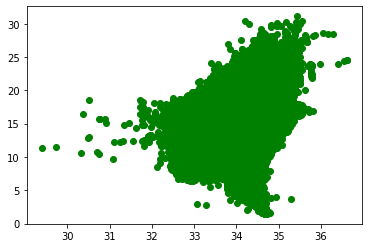

In [593]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='blue')
plt.title("Linear Regression Model")
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

In [ ]:
# As Salinity increasing Temperature is decreasing.

In [594]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 4)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [578]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 2.4
R2 Score for Test set: 0.63


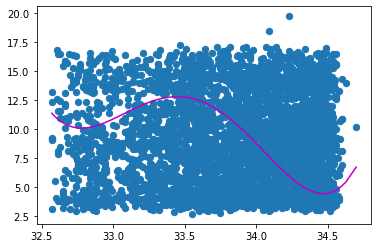

In [586]:
plt.scatter(X_train, y_train, s=40)
# sort the values of x before line plot
# sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train, polynomial_predict))
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.show()

In [107]:
dataSet.describe()

,T_degC,Salnty
count,853900,817509
unique,13847,14602
top,9.100000,33.58000
freq,1115,3953


In [108]:
dataSet.isnull().sum()

T_degC    10963
Salnty    47354
dtype: int64

In [109]:
dataSet = dataSet.dropna()

In [110]:
dataSet.isnull().sum()

T_degC    0
Salnty    0
dtype: int64

In [5]:
dataSet.astype(float)

,T_degC,Salnty
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


In [ ]:
dataSet["T_degC"].corr(bottle_df["Salnty"]).head()

In [125]:
# Finding correlation using bottle columns 
data = bottle_df[["Depthm", "T_degC", "Salnty", "O2ml_L", "PO4q", "SiO3qu","NO3q","NH3q","NO2q"]]
correlation = data.corr(method='pearson')
correlation.head()

""


In [102]:
#  Depth_ID = [Century]-[YY][MM][ShipCode]-etc
#  19-4903CR-HY-060-0930-05400560-0020A-7
bottle_df['Year'] = (bottle_df['Depth_ID'].str.split('-', expand=True)[0] + \
                bottle_df['Depth_ID'].str.split('-', expand=True)[1]). \
                map(lambda x: str(x)[:4])
bottle_df['Month'] = (bottle_df['Depth_ID'].str.split('-', expand=True)[1]). \
                 map(lambda x: str(x)[2:4])
                 
bottle_df[['Depth_ID','Year','Month']].head(10)

,Depth_ID,Year,Month
0,19-4903CR-HY-060-0930-05400560-0000A-3,1949,03
1,19-4903CR-HY-060-0930-05400560-0008A-3,1949,03
2,19-4903CR-HY-060-0930-05400560-0010A-7,1949,03
3,19-4903CR-HY-060-0930-05400560-0019A-3,1949,03
4,19-4903CR-HY-060-0930-05400560-0020A-7,1949,03
5,19-4903CR-HY-060-0930-05400560-0030A-7,1949,03
6,19-4903CR-HY-060-0930-05400560-0039A-3,1949,03
7,19-4903CR-HY-060-0930-05400560-0050A-7,1949,03
8,19-4903CR-HY-060-0930-05400560-0058A-3,1949,03
9,19-4903CR-HY-060-0930-05400560-0075A-7,1949,03


In [103]:
drop_cols = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm','Year','Month']
df_norm = bottle_df.drop(drop_cols, axis=1)  #  data for normalization
df_scale = df_norm.copy(deep=True)    #  backup data

In [ ]:
# Data cleaning
# checking for Nulls/Duplicates


In [14]:
# removing duplicates 
bottle_df.drop_duplicates()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50000,33.44000,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46000,33.44000,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46000,33.43700,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45000,33.42000,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45000,33.42100,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.74400,33.40830,5.805000,23.87055,108.7400,...,0.180000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.74400,33.40830,5.805000,23.87072,108.7400,...,0.180000,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.69200,33.41500,5.796000,23.88911,108.4600,...,0.180000,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.16100,33.40620,5.816000,24.01426,107.7400,...,0.310000,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Displaying the count of null values per column
bottle_df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [17]:
# Dropping the row having null value
bottle_df.dropna()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
